# Análise de Dados 

#Análise Exploratória de Dados

Estamos usando os dados de séries do IMDB (_Internet Movie DataBase_) para fazer uma análise exploratória de dados de um seriado. Os dados estão no arquivo `'dados/avaliacao_episodios_series_top.csv`. Escolhi uma das séries que estão no arquivo para analisar. Critérios: a série deve ter no mínimo 4 temporadas para permitir uma análise mais detalhada.

In [2]:
import pandas as pd

# Substitua o filtro com o nome da série que você deseja analisar
dexter = (
    pd.read_csv('dados/avaliacao_episodios_series_top.csv')
    .query("nome_serie == 'Dexter'")
)
dexter


,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
2043,tt0773262,Dexter,tt0785280,1.0,1.0,Dexter,2006,"Crime,Drama,Mystery",53.0,8.6,14007
2044,tt0773262,Dexter,tt0757186,1.0,2.0,Crocodile,2006,"Crime,Drama,Mystery",55.0,8.2,9818
2045,tt0773262,Dexter,tt0828745,1.0,3.0,Popping Cherry,2006,"Crime,Drama,Mystery",51.0,8.2,9230
2046,tt0773262,Dexter,tt0824887,1.0,4.0,Let's Give the Boy a Hand,2006,"Crime,Drama,Mystery",58.0,8.6,9034
2047,tt0773262,Dexter,tt0823912,1.0,5.0,Love American Style,2006,"Crime,Drama,Mystery",56.0,8.4,8657
...,...,...,...,...,...,...,...,...,...,...,...
2134,tt0773262,Dexter,tt2578778,8.0,8.0,Are We There Yet?,2013,"Crime,Drama,Mystery",52.0,8.0,5991
2135,tt0773262,Dexter,tt2578782,8.0,9.0,Make Your Own Kind of Music,2013,"Crime,Drama,Mystery",55.0,7.3,5865
2136,tt0773262,Dexter,tt2578788,8.0,10.0,Goodbye Miami,2013,"Crime,Drama,Mystery",53.0,6.9,6503
2137,tt0773262,Dexter,tt2578790,8.0,11.0,Monkey in a Box,2013,"Crime,Drama,Mystery",52.0,7.2,6778


## Popularidade dos episódios

### Qual a distribuição de votos que cada episódio teve?

Explore a popularidade de cada episódio analisando a quantidade de votos que cada um recebeu (`num_votos`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.


In [3]:
votos = dexter["num_votos"].describe().round(2)
print(votos)


count       96.00
mean      7420.32
std       2916.64
min       5393.00
25%       5840.75
50%       6494.00
75%       7706.50
max      24674.00
Name: num_votos, dtype: float64


*Count* (Quantidade de observações)
Mostra o total de episódios considerados na análise.

*Mean* (Média)
É a média aritmética do número de votos, onde a média vai ser a soma dos números de votos dividido pelos números de episódios.

*STD - Standard Deviation* (Desvio padrão)
Mede o quanto os valores variam em relação à média. Quanto maior, mais dispersos os dados estão.

*Min* (Mínimo)
Neste caso o episódio menos votado recebeu 5393 votos.

*Quartis*
- Q1(25%) = 5840.75 votos
25% dos episódios receberam até 5.841 votos.
Isso indica um limiar inferior para os episódios com menor popularidade.

- Q2(50% - Mediana) = 6494 votos
A mediana indica o "meio" dos dados, ou seja, metade dos episódios receberam menos que 6.494 votos, e metade recebeu mais.
Diferente da média, a mediana não é tão afetada por episódios com votos extremos.

- Q3(75%) = 7706 votos
75% dos episódios receberam até 7706 votos, enquanto 25% receberam mais do que isso.
Isso mostra um limiar superior para episódios com mais engajamento.

*Max* (Máximo)
O episódio mais votado recebeu 24674 votos.


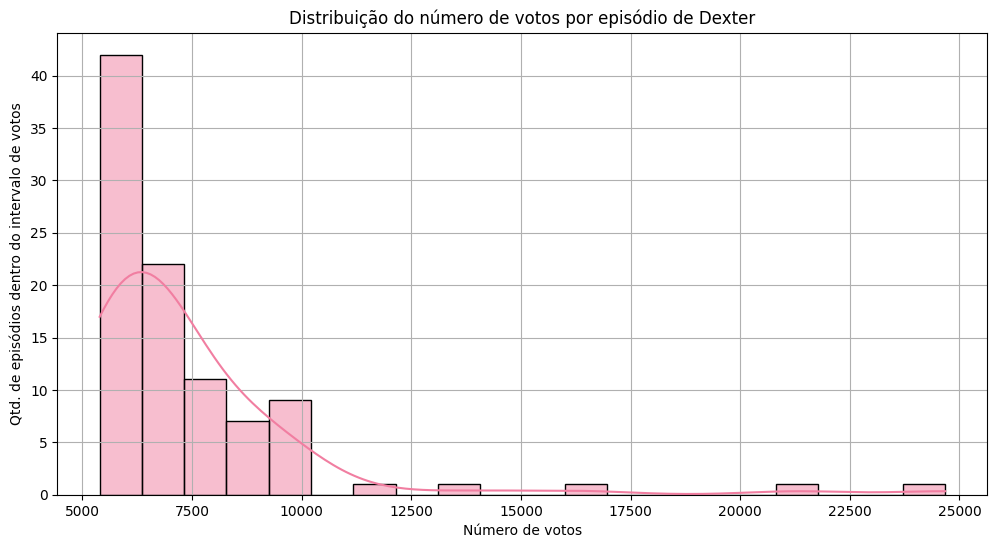

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(dexter["num_votos"], bins=20, kde=True, color = "#f17ea1")
plt.xlabel("Número de votos")
plt.ylabel("Qtd. de episódios dentro do intervalo de votos")
plt.title("Distribuição do número de votos por episódio de Dexter")
plt.grid(True)
plt.show()


O *histograma* tem como intenção mostrar a distribuição da quantidade de votos que os episódios de Dexter receberam, cada barra representa um intervalo de número de votos. Se um episódio recebeu um número de votos que está dentro daquele intervalo, ele contribuiu para a altura da barra.
O eixo X representa o número de votos que os episódios receberam e o eixo Y representa quantos episódios caíram dentro daquele intervalo de votos.

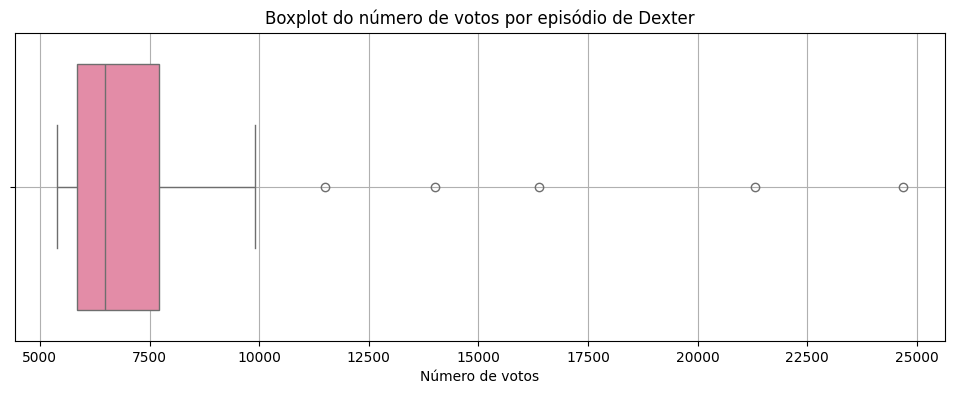

In [5]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = dexter["num_votos"], color = "#f17ea1")
plt.xlabel("Número de votos")
plt.title("Boxplot do número de votos por episódio de Dexter")
plt.grid(True)
plt.show()


### Qual o episódio mais popular (com mais votos)?

In [6]:
episodio_mais_popular = dexter[dexter["num_votos"] == dexter["num_votos"].max()] #enncontrando o episódio com mais votos

print(episodio_mais_popular)


       id_serie nome_serie id_episodio  temporada  num_episodio  \
2138  tt0773262     Dexter   tt2578802        8.0          12.0   

               nome_episodio   ano              generos  duracao_minutos  \
2138  Remember the Monsters?  2013  Crime,Drama,Mystery             56.0   

      avaliacao_media  num_votos  
2138              4.8      24674  


In [7]:
df_popular = episodio_mais_popular[[
    "temporada", "num_episodio", "nome_episodio", "ano", 
    "duracao_minutos", "avaliacao_media", "num_votos"
]]
popular = df_popular.rename(columns={
    "temporada": "Temporada",
    "num_episodio": "Episódio",
    "nome_episodio": "Nome do Episódio",
    "ano": "Ano",
    "duracao_minutos": "Duração (min)",
    "avaliacao_media": "Avaliação Média",
    "num_votos": "Número de Votos"
}) #renomeando as  colunas para melhor organização 

print(popular)

      Temporada  Episódio        Nome do Episódio   Ano  Duração (min)  \
2138        8.0      12.0  Remember the Monsters?  2013           56.0   

      Avaliação Média  Número de Votos  
2138              4.8            24674  


### Qual o episódio menos popular (com menos votos)?

In [8]:
episodio_menos_popular = dexter[dexter["num_votos"] == dexter["num_votos"].min()]
print(episodio_menos_popular)


       id_serie nome_serie id_episodio  temporada  num_episodio  \
2112  tt0773262     Dexter   tt1890877        6.0          10.0   

        nome_episodio   ano              generos  duracao_minutos  \
2112  Ricochet Rabbit  2011  Crime,Drama,Mystery             49.0   

      avaliacao_media  num_votos  
2112              7.9       5393  


In [9]:
menos_popular = episodio_menos_popular[[
    "temporada", "num_episodio", "nome_episodio", "ano", 
    "duracao_minutos", "avaliacao_media", "num_votos"
]]

menos_popular = menos_popular.rename(columns={
    "temporada": "Temporada",
    "num_episodio": "Episódio",
    "nome_episodio": "Nome do Episódio",
    "ano": "Ano",
    "duracao_minutos": "Duração (min)",
    "avaliacao_media": "Avaliação Média",
    "num_votos": "Número de Votos"
})

# Exibir o DataFrame
print(menos_popular)


      Temporada  Episódio Nome do Episódio   Ano  Duração (min)  \
2112        6.0      10.0  Ricochet Rabbit  2011           49.0   

      Avaliação Média  Número de Votos  
2112              7.9             5393  


### Qual a temporada mais popular?

In [10]:
#contando quantos episodios as temporadas tem 
episodios_por_temporada = dexter["temporada"].value_counts().reset_index()

episodios_por_temporada.columns = ["Temporada", "Quantidade de Episódios"]

episodios_por_temporada = episodios_por_temporada.sort_values(by="Temporada")

print(episodios_por_temporada)


   Temporada  Quantidade de Episódios
0        1.0                       12
1        2.0                       12
2        3.0                       12
3        4.0                       12
4        5.0                       12
5        6.0                       12
6        7.0                       12
7        8.0                       12


In [11]:
temporadas_populares = dexter.groupby("temporada")["num_votos"].mean().reset_index().round(2) #agrupado por temporada e calcular a média de votos
print(temporadas_populares)

temporada_mais_popular = temporadas_populares[temporadas_populares["num_votos"] == temporadas_populares["num_votos"].max()] #verificando qual temporada foi mais popular

temporada_mais_popular = temporada_mais_popular.rename(columns={
    "temporada": "Temporada",
    "num_votos": "Média de Votos"
})


print(temporada_mais_popular)


   temporada  num_votos
0        1.0   10169.33
1        2.0    7780.08
2        3.0    6510.75
3        4.0    8457.17
4        5.0    6101.42
5        6.0    5976.33
6        7.0    6749.42
7        8.0    7618.08
   Temporada  Média de Votos
0        1.0        10169.33


In [12]:
print(temporadas_populares.sort_values(by="temporada", ascending=True))


   temporada  num_votos
0        1.0   10169.33
1        2.0    7780.08
2        3.0    6510.75
3        4.0    8457.17
4        5.0    6101.42
5        6.0    5976.33
6        7.0    6749.42
7        8.0    7618.08


### Qual a temporada menos popular?

In [13]:
temporada_menos_popular = temporadas_populares[temporadas_populares["num_votos"] == temporadas_populares["num_votos"].min()]

temporada_menos_popular = temporada_menos_popular.rename(columns={
    "temporada": "Temporada",
    "num_votos": "Média de Votos"
})

print(temporada_menos_popular)

   Temporada  Média de Votos
5        6.0         5976.33


## Qualidade dos episódios

### Qual a distribuição de avaliações que cada episódio teve?

Explore a qualidade de cada episódio analisando a avaliação média que cada um recebeu (`avaliacao_media`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.



Text(0.5, 0, 'Avaliação Média')

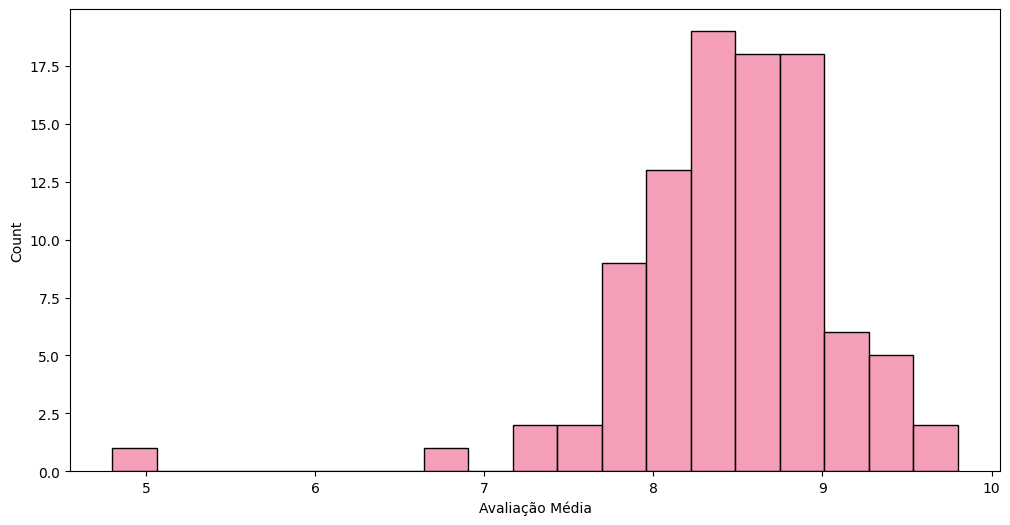

In [14]:
#sns.histplot(dexter["avaliacao_media"], bins=20, kde=True, color = "#f17ea1")
plt.figure(figsize=(12, 6))
sns.histplot(data = dexter, x = "avaliacao_media", color = "#f17ea1")
plt.xlabel("Avaliação Média")

<Axes: xlabel='avaliacao_media'>

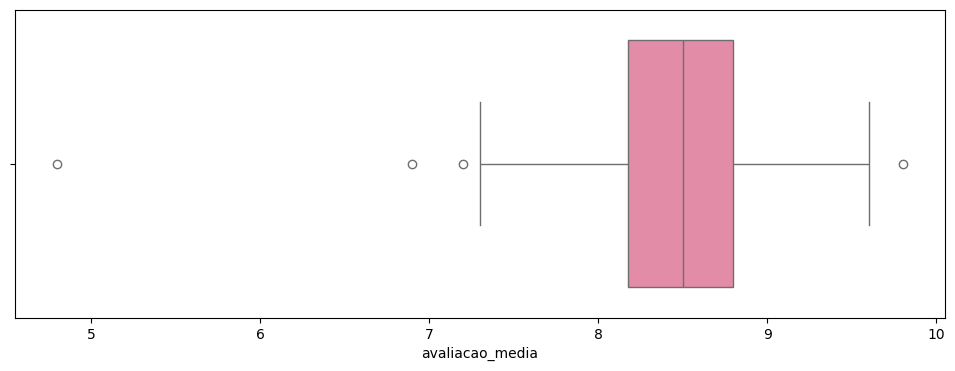

In [15]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = dexter["avaliacao_media"], color = "#f17ea1")

### Qual o melhor episódio da série de acordo com as avaliações do IMDB?

In [16]:
episodio_melhor_avaliado = dexter[dexter["avaliacao_media"] == dexter["avaliacao_media"].max()] #enncontrando o episódio com maior avaliação 

melhor_avaliado = episodio_melhor_avaliado[[
    "temporada", "num_episodio", "nome_episodio", "avaliacao_media", "ano", 
    "duracao_minutos", "num_votos"
]]

melhor_avaliado = melhor_avaliado.rename(columns={
    "temporada": "Temporada",
    "num_episodio": "Episódio",
    "nome_episodio": "Nome do Episódio",
     "avaliacao_media": "Avaliação Média",
    "ano": "Ano",
    "duracao_minutos": "Duração (min)",
    "num_votos": "Número de Votos"
})

print(melhor_avaliado)


      Temporada  Episódio Nome do Episódio  Avaliação Média   Ano  \
2090        4.0      12.0      The Getaway              9.8  2009   

      Duração (min)  Número de Votos  
2090           51.0            21302  


### Qual o pior episódio da série de acordo com as avaliações do IMDB?

In [17]:
pior_episodio_avaliado = dexter[dexter["avaliacao_media"] == dexter["avaliacao_media"].min()] #encontrando o episódio com menor avaliação


pior_avaliado = pior_episodio_avaliado[[
    "temporada", "num_episodio", "nome_episodio", "avaliacao_media", "ano", 
    "duracao_minutos", "num_votos"
]]

pior_avaliado = pior_avaliado.rename(columns={
    "temporada": "Temporada",
    "num_episodio": "Episódio",
    "nome_episodio": "Nome do Episódio",
     "avaliacao_media": "Avaliação Média",
    "ano": "Ano",
    "duracao_minutos": "Duração (min)",
    "num_votos": "Número de Votos"
})

print(pior_avaliado)

      Temporada  Episódio        Nome do Episódio  Avaliação Média   Ano  \
2138        8.0      12.0  Remember the Monsters?              4.8  2013   

      Duração (min)  Número de Votos  
2138           56.0            24674  


### Qual a melhor temporada da série de acordo com as avaliações do IMDB?

In [18]:
#avaliações média das tempordas
temporadas_avaliadas = dexter.groupby("temporada")["avaliacao_media"].mean().reset_index().round(2) #agrupado por temporada e calcular a média de avaliacções
print(temporadas_avaliadas)

   temporada  avaliacao_media
0        1.0             8.73
1        2.0             8.76
2        3.0             8.42
3        4.0             8.90
4        5.0             8.55
5        6.0             8.16
6        7.0             8.67
7        8.0             7.44


In [19]:
#Melhor temporada
temporada_melhor_avaliada = temporadas_avaliadas[temporadas_avaliadas["avaliacao_media"] == temporadas_avaliadas["avaliacao_media"].max()] #verificando qual temporada foi melhor avaliada

temporada_melhor_avaliada = temporada_melhor_avaliada.rename(columns={
    "temporada": "Temporada",
    "num_votos": "Média de Votos"
})


print(temporada_melhor_avaliada)

   Temporada  avaliacao_media
3        4.0              8.9


### Qual a pior temporada da série de acordo com as avaliações do IMDB?

In [20]:

temporada_pior_avaliada = temporadas_avaliadas[temporadas_avaliadas["avaliacao_media"] == temporadas_avaliadas["avaliacao_media"].min()] #verificando qual temporada foi melhor avaliada

temporada_pior_avaliada = temporada_pior_avaliada.rename(columns={
    "temporada": "Temporada",
    "num_votos": "Média de Votos"
})


print(temporada_pior_avaliada)

   Temporada  avaliacao_media
7        8.0             7.44


## Relação entre variáveis

Analise a relação entre as variáveis referentes a cada episódio. Explore visualmente a relação entre elas e calcula estatísticas de correlação.

### Existe alguma relação entre a quantidade de votos recebida e a avaliação média dos episódios?

In [21]:

# Calcular a correlação entre as variáveis 'num_votos' e 'avaliacao_media'
correlacao_voto_avaliacao = dexter[['num_votos', 'avaliacao_media']].corr()

correlacao_voto_avaliacao = correlacao_voto_avaliacao.rename(columns={
    "num_votos": "Número de Votos",
    "avaliacao_media": "Avaliação Média"
})

# Exibir a matriz de correlação
print("Matriz de correlação entre votos e avaliação média:")
print(correlacao_voto_avaliacao)

Matriz de correlação entre votos e avaliação média:
                 Número de Votos  Avaliação Média
num_votos               1.000000         0.027158
avaliacao_media         0.027158         1.000000


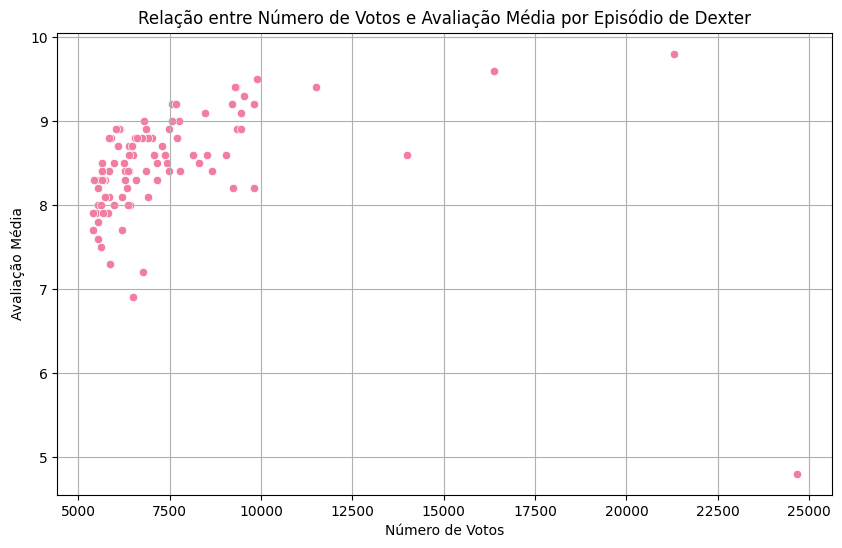

In [22]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'num_votos', y = 'avaliacao_media', data = dexter, color = "#f17ea1")
plt.xlabel("Número de Votos")
plt.ylabel("Avaliação Média")
plt.title("Relação entre Número de Votos e Avaliação Média por Episódio de Dexter")
plt.grid(True)
plt.show()


Aqui conseguimos notar uma tendência positiva em relação a avaliação média e o número de votos, onde episódios com mais votos mostram ter também avaliações mais altas

Também conseguimos identificar que a maioria dos episódios tem uma avaliação média entre 8, mostrando que os episódios com melhor avaliação também são os mais votados

Apesar disto conseguimos identificar outliers, onde apesar do episódio possuir uma quantidade alta de votos a sua avaliação média é extremamente baixa

### Existe alguma relação entre a quantidade de votos recebida e o número do episódio?

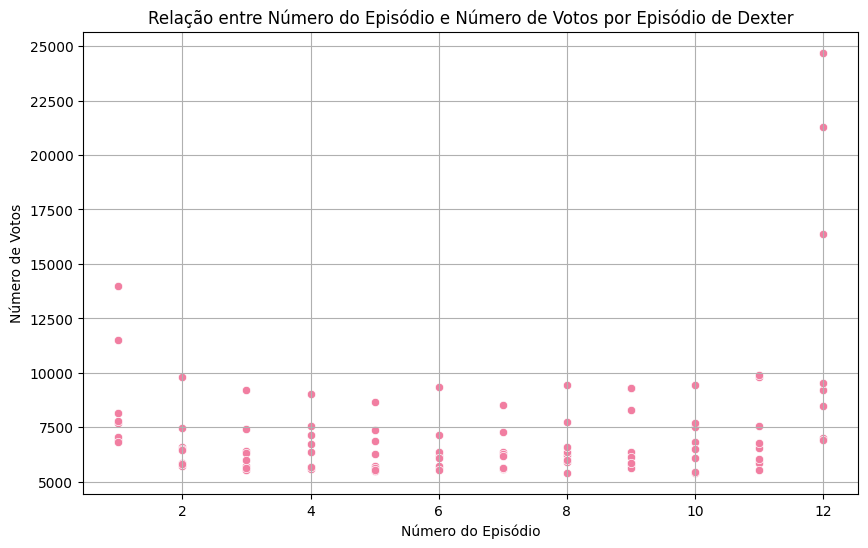

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'num_episodio', y ='num_votos', data = dexter, color = "#f17ea1")
plt.xlabel("Número do Episódio")
plt.ylabel("Número de Votos")
plt.title("Relação entre Número do Episódio e Número de Votos por Episódio de Dexter")
plt.grid(True)
plt.show()


Podemos notar que não há uma relação linear entre o número de episódios e a quantidade de votos, mas podemos perceber que existe uma concentação de votos em torno da faixa de valor entre 5.000 e 10.000

## Padrões temporais

Explore as avaliações de temporadas e episódios ao longo do tempo.

### As primeiras temporadas são melhor avaliadas do que as últimas?

   temporada  avaliacao_media
0        1.0             8.73
1        2.0             8.76
2        3.0             8.42
3        4.0             8.90
4        5.0             8.55
5        6.0             8.16
6        7.0             8.67
7        8.0             7.44


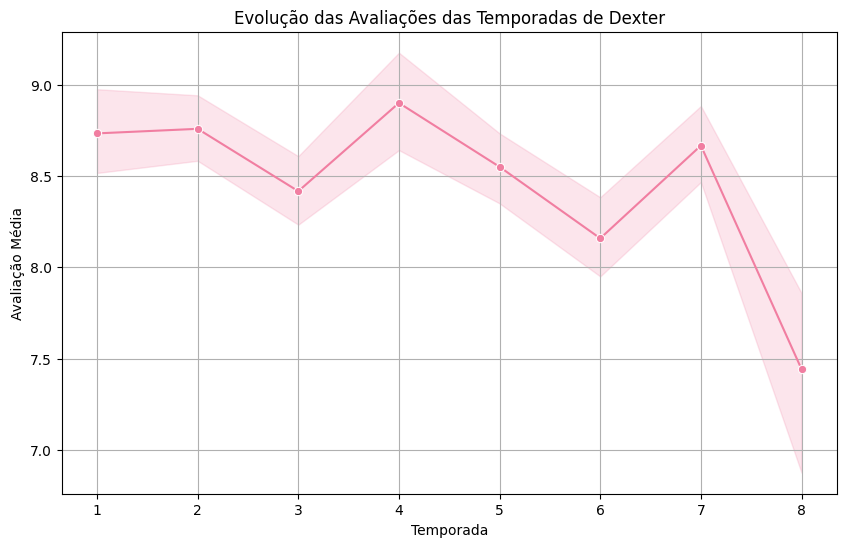

In [24]:
print(temporadas_avaliadas)

plt.figure(figsize = (10, 6))
sns.lineplot(x = "temporada", y = "avaliacao_media", data = dexter, marker="o", color = "#f17ea1")
plt.xlabel("Temporada")
plt.ylabel("Avaliação Média")
plt.title("Evolução das Avaliações das Temporadas de Dexter")
plt.grid(True)
plt.show()

Não são, pois não podemos dizer que há regularidade entre as avaliações das temporadas, como podemos ver há diversas váriações entre as mesmas, não existindo claramente uma tendência

### Os episódios no fim das temporadas são melhor avaliados do que os do início?

In [25]:
inicio_episodios = 2  #primeiros 2 episódios
fim_episodios = 2  #ultimos 2 episódios

#agrupar por temporada e calcular as médias das avaliações para os episódios do início e fim
resultados = []

#para cada temporada, calcular a média das avaliações de início e fim
for temporada in dexter["temporada"].unique():
    temporada_episodios = dexter[dexter["temporada"] == temporada]
    
    inicio = temporada_episodios.head(inicio_episodios)
    fim = temporada_episodios.tail(fim_episodios)
    
    media_inicio = inicio["avaliacao_media"].mean()
    media_fim = fim["avaliacao_media"].mean()
    
    resultados.append({
        "temporada": temporada,
        "media_inicio": media_inicio,
        "media_fim": media_fim
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

   temporada  media_inicio  media_fim
0        1.0          8.40       9.40
1        2.0          8.50       9.10
2        3.0          8.20       8.80
3        4.0          8.60       9.65
4        5.0          8.45       8.80
5        6.0          8.15       8.65
6        7.0          9.05       9.10
7        8.0          8.15       6.00


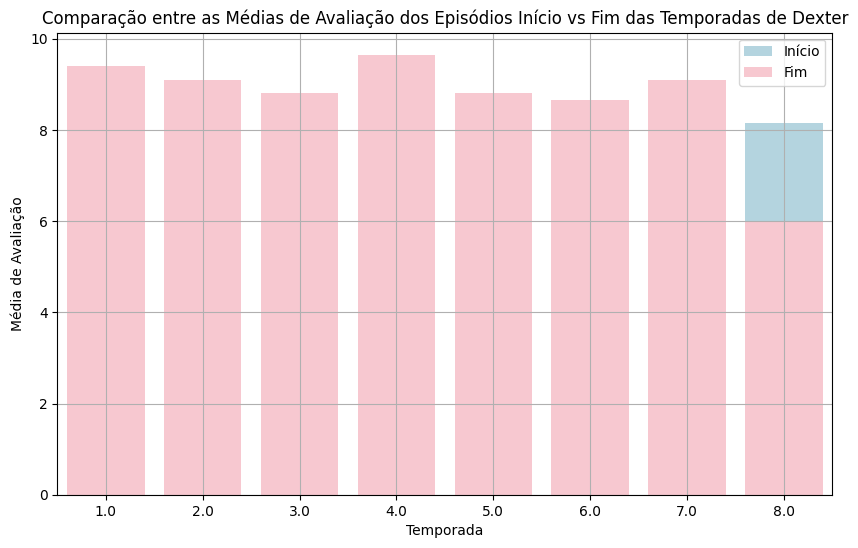

In [26]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "temporada", y = "media_inicio", data = df_resultados, color = "lightblue", label = "Início")
sns.barplot(x = "temporada", y = "media_fim", data = df_resultados, color="pink", label = "Fim")
plt.xlabel("Temporada")
plt.ylabel("Média de Avaliação")
plt.title("Comparação entre as Médias de Avaliação dos Episódios Início vs Fim das Temporadas de Dexter")
plt.legend()
plt.grid(True)
plt.show()

Não parece haver uma diferença significativa nas médias de avaliação entre os episódios do início e os episódios do fim de cada temporada. As barras de ambos são bastante próximas em cada temporada.

Contudo a temporada 8 é uma exceção, onde a média de avaliação dos episódios do fim da temporada é mais baixa em comparação com o início da temporada

### Qual é a temporada mais regular? (com menor variação de avaliações)

In [27]:
desvio_padrao_temporada = dexter.groupby("temporada")["avaliacao_media"].std().reset_index()

temporada_mais_regular = desvio_padrao_temporada[desvio_padrao_temporada["avaliacao_media"] == desvio_padrao_temporada["avaliacao_media"].min()]

temporada_mais_regular = temporada_mais_regular.rename(columns={
    "temporada": "Temporada",
    "avaliacao_media": "Desvio Padrão"
})
print("Temporada mais regular:")
print(temporada_mais_regular)

Temporada mais regular:
   Temporada  Desvio Padrão
1        2.0       0.339675


### Qual é a temporada mais instável? (com maior variação de avaliações)

In [28]:
temporada_menos_regular = desvio_padrao_temporada[desvio_padrao_temporada["avaliacao_media"] == desvio_padrao_temporada["avaliacao_media"].max()]

temporada_menos_regular = temporada_menos_regular.rename(columns={
    "temporada": "Temporada",
    "avaliacao_media": "Desvio Padrão"
})  

print("Temporada mais instável:")
print(temporada_menos_regular)

Temporada mais instável:
   Temporada  Desvio Padrão
7        8.0       0.927811


## Valores incomuns

Existem outliers nos dados?

### Existem episódios outliers em termos de popularidade?

In [29]:
#calcular o 1º quartil e o 3º quartil para o número de votos
Q1 = dexter["num_votos"].quantile(0.25)
Q3 = dexter["num_votos"].quantile(0.75)

#necesssário alcular intervalo interquartil
IQR = Q3 - Q1

#definir os limites para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os episódios que são outliers (com votos fora dos limites)
outliers = dexter[(dexter["num_votos"] < limite_inferior) | (dexter["num_votos"] > limite_superior)] #para encontrar os episódios fora dos limites estabelecidos 

outliers = outliers.rename(columns={
    "nome_episodio": "Episódio",
    "temporada": "Temporada",
    "num_episodio": "Número do episódio",
    "num_votos": "Número de votos"
})

print("Episódios Outliers em Popularidade (Número de Votos):")
print(outliers[['Episódio', 'Temporada', 'Número do episódio', 'Número de votos']])


Episódios Outliers em Popularidade (Número de Votos):
                    Episódio  Temporada  Número do episódio  Número de votos
2043                  Dexter        1.0                 1.0            14007
2054               Born Free        1.0                12.0            16383
2090             The Getaway        4.0                12.0            21302
2115             Are You...?        7.0                 1.0            11504
2138  Remember the Monsters?        8.0                12.0            24674


### Existem episódios outliers em termos de avaliação recebida?


In [30]:
Q1 = dexter["avaliacao_media"].quantile(0.25)
Q3 = dexter["avaliacao_media"].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_avaliacao = dexter[(dexter["avaliacao_media"] < limite_inferior) | (dexter["avaliacao_media"] > limite_superior)]

outliers_avaliacao = outliers_avaliacao.rename(columns={
    "nome_episodio": "Episódio",
    "temporada": "Temporada",
    "num_episodio": "Número do episódio",
    "avaliacao_media": "Avaliação Média"
})

print("Episódios Outliers em Avaliação:")
print(outliers_avaliacao[['Episódio', 'Temporada', 'Número do episódio', 'Avaliação Média']])


Episódios Outliers em Avaliação:
                    Episódio  Temporada  Número do episódio  Avaliação Média
2090             The Getaway        4.0                12.0              9.8
2136           Goodbye Miami        8.0                10.0              6.9
2137         Monkey in a Box        8.0                11.0              7.2
2138  Remember the Monsters?        8.0                12.0              4.8


## Outras análises

Fique livre para explorar outras análises, fazer novas perguntas e comparar padrões nos dados de uma série com os de outra série.

## Tendência de votos por temporada 

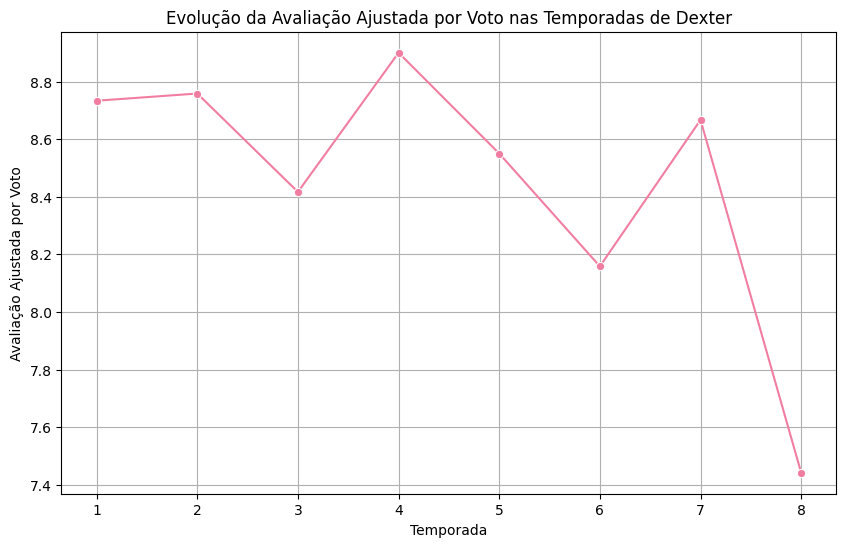

In [31]:
avaliacao_temporada = dexter.groupby("temporada").agg(
    total_votos=("num_votos", "sum"),
    media_avaliacao=("avaliacao_media", "mean")
).reset_index()

avaliacao_temporada["avaliacao_ajustada"] = avaliacao_temporada["media_avaliacao"] * avaliacao_temporada["total_votos"] #ajuste
avaliacao_temporada["avaliacao_ajustada_normalizada"] = avaliacao_temporada["avaliacao_ajustada"] / avaliacao_temporada["total_votos"]

plt.figure(figsize = (10, 6))
sns.lineplot(x = "temporada", y = "avaliacao_ajustada_normalizada", data = avaliacao_temporada, marker = "o", color = "#f17ea1")
plt.xlabel("Temporada")
plt.ylabel("Avaliação Ajustada por Voto")
plt.title("Evolução da Avaliação Ajustada por Voto nas Temporadas de Dexter")
plt.grid(True)
plt.show()



## Impacto dos pisódios 

In [32]:
# Calcular o índice de impacto para cada episódio
dexter["impacto"] = dexter["avaliacao_media"] * dexter["num_votos"]
episodios_impacto = dexter.sort_values(by="impacto", ascending=False)

top_episodios_impacto = episodios_impacto[["nome_episodio", "temporada", "num_episodio", "impacto", "avaliacao_media", "num_votos"]].head(10)
print(top_episodios_impacto)



                nome_episodio  temporada  num_episodio   impacto  \
2090              The Getaway        4.0          12.0  208759.6   
2054                Born Free        1.0          12.0  157276.8   
2043                   Dexter        1.0           1.0  120460.2   
2138   Remember the Monsters?        8.0          12.0  118435.2   
2115              Are You...?        7.0           1.0  108137.6   
2089     Hello, Dexter Morgan        4.0          11.0   94069.0   
2053            Truth Be Told        1.0          11.0   90353.2   
2126  Surprise, Motherf**ker!        7.0          12.0   88703.4   
2063     Resistance Is Futile        2.0           9.0   87664.4   
2087               Hungry Man        4.0           9.0   87354.2   

      avaliacao_media  num_votos  
2090              9.8      21302  
2054              9.6      16383  
2043              8.6      14007  
2138              4.8      24674  
2115              9.4      11504  
2089              9.5       9902  
2053  

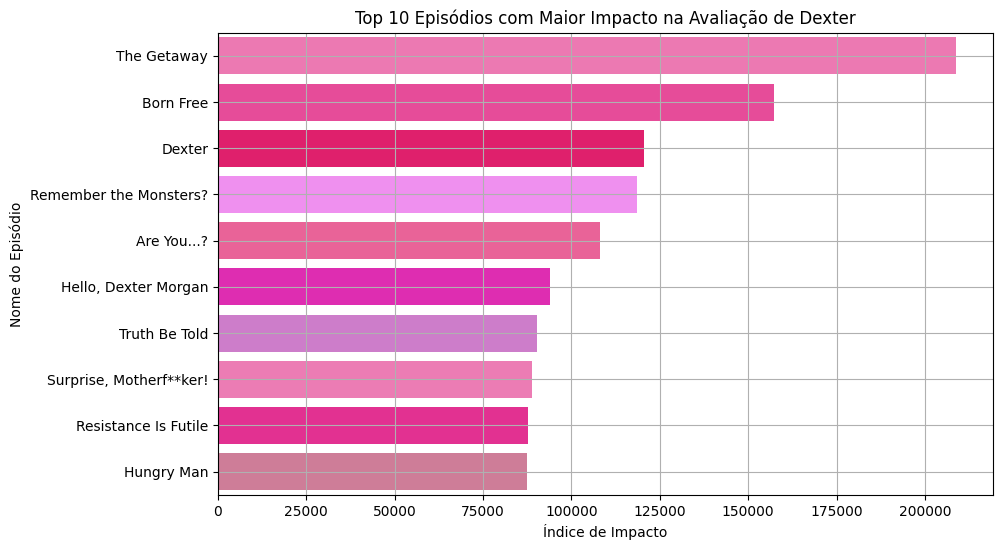

In [33]:
#palette = sns.color_palette(["#FF66B2", "#FF3399", "#FF0066", "#FF80FF", "#FF4D94", ])

plt.figure(figsize = (10, 6))
sns.barplot(x = "impacto", y = "nome_episodio", data = top_episodios_impacto, palette = ["#FF66B2", "#FF3399", "#FF0066", "#FF80FF", "#FF4D94", "#fc0fc0", 
"#da70d6", "#ff69b4", "#ff1493", "#db7093"], hue = "nome_episodio", legend = False)         
                                                                                         
plt.xlabel("Índice de Impacto")
plt.ylabel("Nome do Episódio")
plt.title("Top 10 Episódios com Maior Impacto na Avaliação de Dexter")
plt.grid(True)
plt.show()
